In [1]:
import pandas as pd
import numpy as np
%pylab inline
pylab.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('bank-additional-names.txt', encoding='utf-8') as f:
    text = f.read()

print(text)

﻿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This

In [3]:
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data = data.rename(columns={c: c.replace('.', '_') for c in data.columns})

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

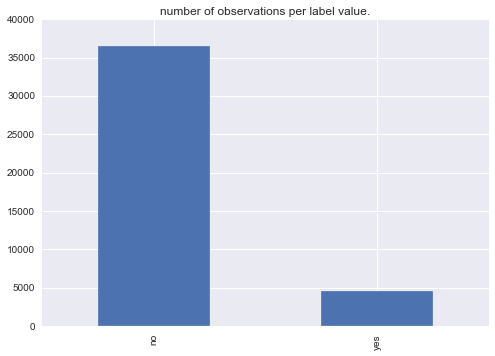

In [33]:
data['y'].value_counts().plot(kind='bar', title='number of observations per label value.')

In [8]:
numeric_cols = data.dtypes[data.dtypes == np.float].index

In [9]:
numeric_cols

Index(['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed'],
      dtype='object')

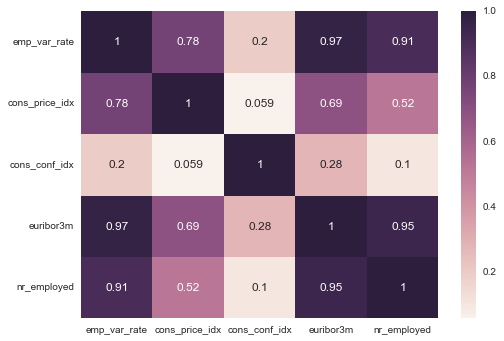

In [10]:
corrs = data.loc[:, numeric_cols].corr()

import seaborn as sns
sns.heatmap(corrs, annot=True)

In [11]:
data.groupby(by='y')[numeric_cols].describe().T

y                    no                                                        \
                  count         mean        std       min       25%       50%   
emp_var_rate    36548.0     0.248875   1.482932    -3.400    -1.800     1.100   
cons_price_idx  36548.0    93.603757   0.558993    92.201    93.075    93.918   
cons_conf_idx   36548.0   -40.593097   4.391155   -50.800   -42.700   -41.800   
euribor3m       36548.0     3.811491   1.638187     0.634     1.405     4.857   
nr_employed     36548.0  5176.166600  64.571979  4963.600  5099.100  5195.800   

y                                      yes                                    \
                     75%       max   count         mean        std       min   
emp_var_rate       1.400     1.400  4640.0    -1.233448   1.623626    -3.400   
cons_price_idx    93.994    94.767  4640.0    93.354386   0.676644    92.201   
cons_conf_idx    -36.400   -26.900  4640.0   -39.789784   6.139668   -50.800   
euribor3m          4.962     5.045  4640.0     2.123135   1.742598     0.634   
nr_employed     5228.100  5228.100  4640.0  5095.115991  87.572641  4963.600   

y                                                       
                     25%       50%       75%       max  
emp_var_rate      -1.800    -1.800    -0.100     1.400  
cons_price_idx    92.893    93.200    93.918    94.767  
cons_conf_idx    -46.200   -40.400   -36.100   -26.900  
euribor3m          0.849     1.266     4.406     5.045  
nr_employed     5017.500  5099.100  5191.000  5228.100

In [12]:
from  sklearn.feature_selection import f_classif

In [13]:
f_test_vals, p_vals = f_classif(data[numeric_cols], data['y'])

In [14]:
anova_results = pd.DataFrame(data={'F_test_statistic': f_test_vals, 'p_vals': p_vals}, index=numeric_cols)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

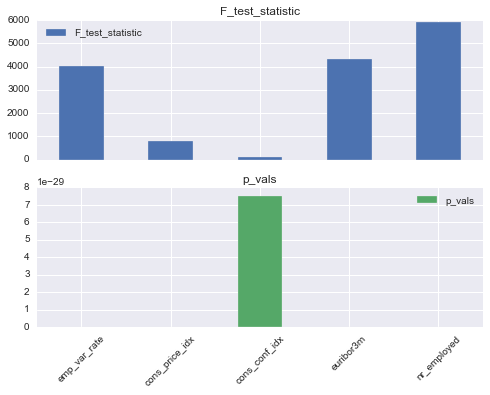

In [15]:
anova_results.plot(kind='bar', subplots=True)
plt.xticks(rotation=45)

In [16]:
data.loc[:, 'y_numeric'] = data['y'].map(lambda v: 1 if v == 'yes' else 0)

In [17]:
import statsmodels.formula.api as sm
model = sm.logit(formula='y_numeric ~ nr_employed', data=data)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.297725
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              y_numeric   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41186
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 May 2017   Pseudo R-squ.:                  0.1543
Time:                        22:13:23   Log-Likelihood:                -12263.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      66.0828      1.065     62.067      0.000      63.996      68.170
nr_employed    -0.0133      0.000    -63.687      0.000      -0.014      -0.013
===============================================================================
"""

In [18]:
col_f = ' + '.join([c for c in numeric_cols if c != 'euribor3m'])
formula = ' ~ '.join(['y_numeric', col_f])
model = sm.logit(formula=formula, data=data)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.295556
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              y_numeric   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41183
Method:                           MLE   Df Model:                            4
Date:                Thu, 04 May 2017   Pseudo R-squ.:                  0.1604
Time:                        22:13:24   Log-Likelihood:                -12173.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -27.5512     10.456     -2.635      0.008     -48.044      -7.058
emp_var_rate      -0.4715      0.051     -9.160      0.000      -0.572      -0.371
cons_price_idx     0.6534      0.076      8.622      0.000       0.505       0.802
cons_conf_idx      0.0371      0.003     12.106      0.000       0.031       0.043
nr_employed       -0.0067      0.001     -9.187      0.000      -0.008      -0.005
==================================================================================
"""

In [19]:
data = data.drop('duration', axis=1)

In [20]:
cat_columns = data.dtypes[data.dtypes == np.object].index

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix

In [24]:
fold = StratifiedKFold(n_splits=5, shuffle=True)
   
def cv(train_index, test_index, df):
    train_data = df.iloc[train_index]
    
    col_f = ' + '.join([c for c in numeric_cols if c != 'euribor3m'])
    formula = ' ~ '.join(['y_numeric', col_f])
    model = sm.logit(formula=formula, data=train_data)
    
    result = model.fit()
    
    predictions = result.predict(df.iloc[test_index])
    
    predictions = predictions.map(lambda v: 'yes' if v >= 0.5 else 'no')
   
    actual = df.iloc[test_index]['y']
    
    #print(confusion_matrix(predictions, actual))
    return f1_score(predictions, actual, labels=['yes', 'no'], average=None)

cv_results = [cv(train_index, test_index, data) for train_index, test_index in fold.split(data['y'], data['y'])] 

Optimization terminated successfully.
         Current function value: 0.296344
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295808
         Iterations 8


d:\Anaconda3\envs\latest\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Optimization terminated successfully.
         Current function value: 0.294743
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294605
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296220
         Iterations 7


In [28]:
results_df = pd.DataFrame(cv_results, columns=['f1_score_yes', 'f1_score_no'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA4AA09940>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001AA4AB0F2E8>], dtype=object)

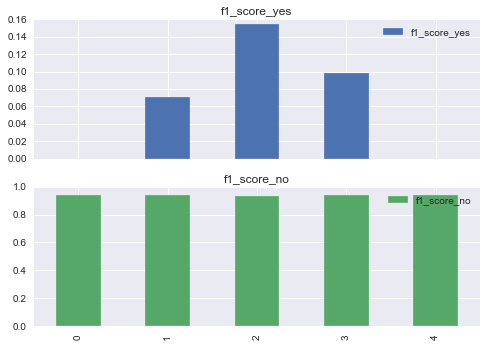

In [29]:
results_df.plot(kind='bar', subplots=True)